In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import json
import folium
import matplotlib.pyplot as plt
#from ortools.constraint_solver import routing_enums_pb2
#from ortools.constraint_solver import pywrapcp

In [10]:
routes = pd.read_csv("/content/drive/MyDrive/451/transit-gtfs-routes.csv")
routes.head(5)

,ID,Short Name,Long Name,Route Type,Color,Route URL,Shape,Filename,geo_point_2d
0,2,2,NaN,Bus,F99D31,NaN,"{""coordinates"": [[[-76.5168, 44.242], [-76.516...",gtfs,"44.2418986939541, -76.50344805387891"
1,4,4,NaN,Bus,ED1556,NaN,"{""coordinates"": [[[-76.57215, 44.25508], [-76....",gtfs,"44.24794594509394, -76.53045187292706"
2,6,6,NaN,Bus,9B5F0E,NaN,"{""coordinates"": [[[-76.52642, 44.22372], [-76....",gtfs,"44.23528429360353, -76.56488990098705"
3,16,16,NaN,Bus,B890C2,NaN,"{""coordinates"": [[[-76.5231, 44.2693], [-76.52...",gtfs,"44.25691251934213, -76.50969933126758"
4,17A,17A,NaN,Bus,000000,NaN,"{""coordinates"": [[[-76.49714, 44.22786], [-76....",gtfs,"44.23199909810767, -76.5025575799956"


,Route URL
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [4]:
kingston_transit_routes = list(routes["ID"])
kingston_transit_routes

['2',
 '4',
 '6',
 '16',
 '17A',
 '17W',
 '801',
 '1',
 '7',
 '12',
 '14',
 '15',
 '20',
 '601',
 '701',
 '702',
 '802',
 '17D',
 '17P',
 '19',
 '999',
 '3',
 '10',
 '11',
 '18',
 '501',
 '502',
 '602',
 'XTRA']

In [5]:
#coordinates = []
coordinates_dict = {}

for index, row in routes.iterrows():
    try:
        shape = routes.iloc[index]['Shape']
        shape = json.loads(shape)['coordinates']
        shape = [(y, x) for [x, y] in shape[0]]
        #coordinates.append(shape)
        coordinates_dict[routes['ID'][index]] = shape
    except:
        pass

#print(coordinates[0])
print(coordinates_dict.keys())


dict_keys(['2', '4', '6', '16', '17A', '17W', '801', '1', '7', '12', '14', '15', '20', '601', '701', '702', '802', '17D', '17P', '19', '3', '10', '11', '18', '501', '502', '602', 'XTRA'])


In [7]:
#for i, j in zip(kingston_transit_routes, coordinates_dict.keys()):
  #print(i, j)
# extra route 999

In [21]:
colors = ['lightred', 'darkpurple', 'orange', 'darkblue', 'darkred', 'pink', 'lightgreen', 'gray', 'darkgreen', 'beige', 'lightblue', 'cadetblue', 'green', 'red', 'purple', 'white', 'black', 'lightgray', 'blue']
#same = ['18', '4']
#done = ['1', '2', '602', '11']
#up = ['1','2','3', '4', '6', '7', '16', '801', '12', '14', '15', '20', '601', '701', '702', '802', '19', '10', '18', '501', '502', '602', '11']
#test = ['601', '602']
# up = ['1','2','3', '4', '6', '7', '16', '17A', '17W', '801', '12', '14', '15', '20', '601', '701', '702', '802', '17D', '17P' '19', '10']

map1 = folium.Map(location=(44.242, -76.5168), tiles='CartoDB Positron', zoom_start=12)
for i, coord in enumerate(coordinates_dict):
    if i == 0:
      print(i, coord)
    #if routes["ID"][i] in test :
    #folium.PolyLine(coord, popup='Route_{}'.format(routes["ID"][i]), color=colors[i%len(colors)]).add_to(map1)
    folium.PolyLine(coordinates_dict[coord], tooltip='Route_{}'.format(coord), weight=3, color=colors[i%len(colors)]).add_to(map1)

map1

0 2


In [44]:
print(4%4)

0


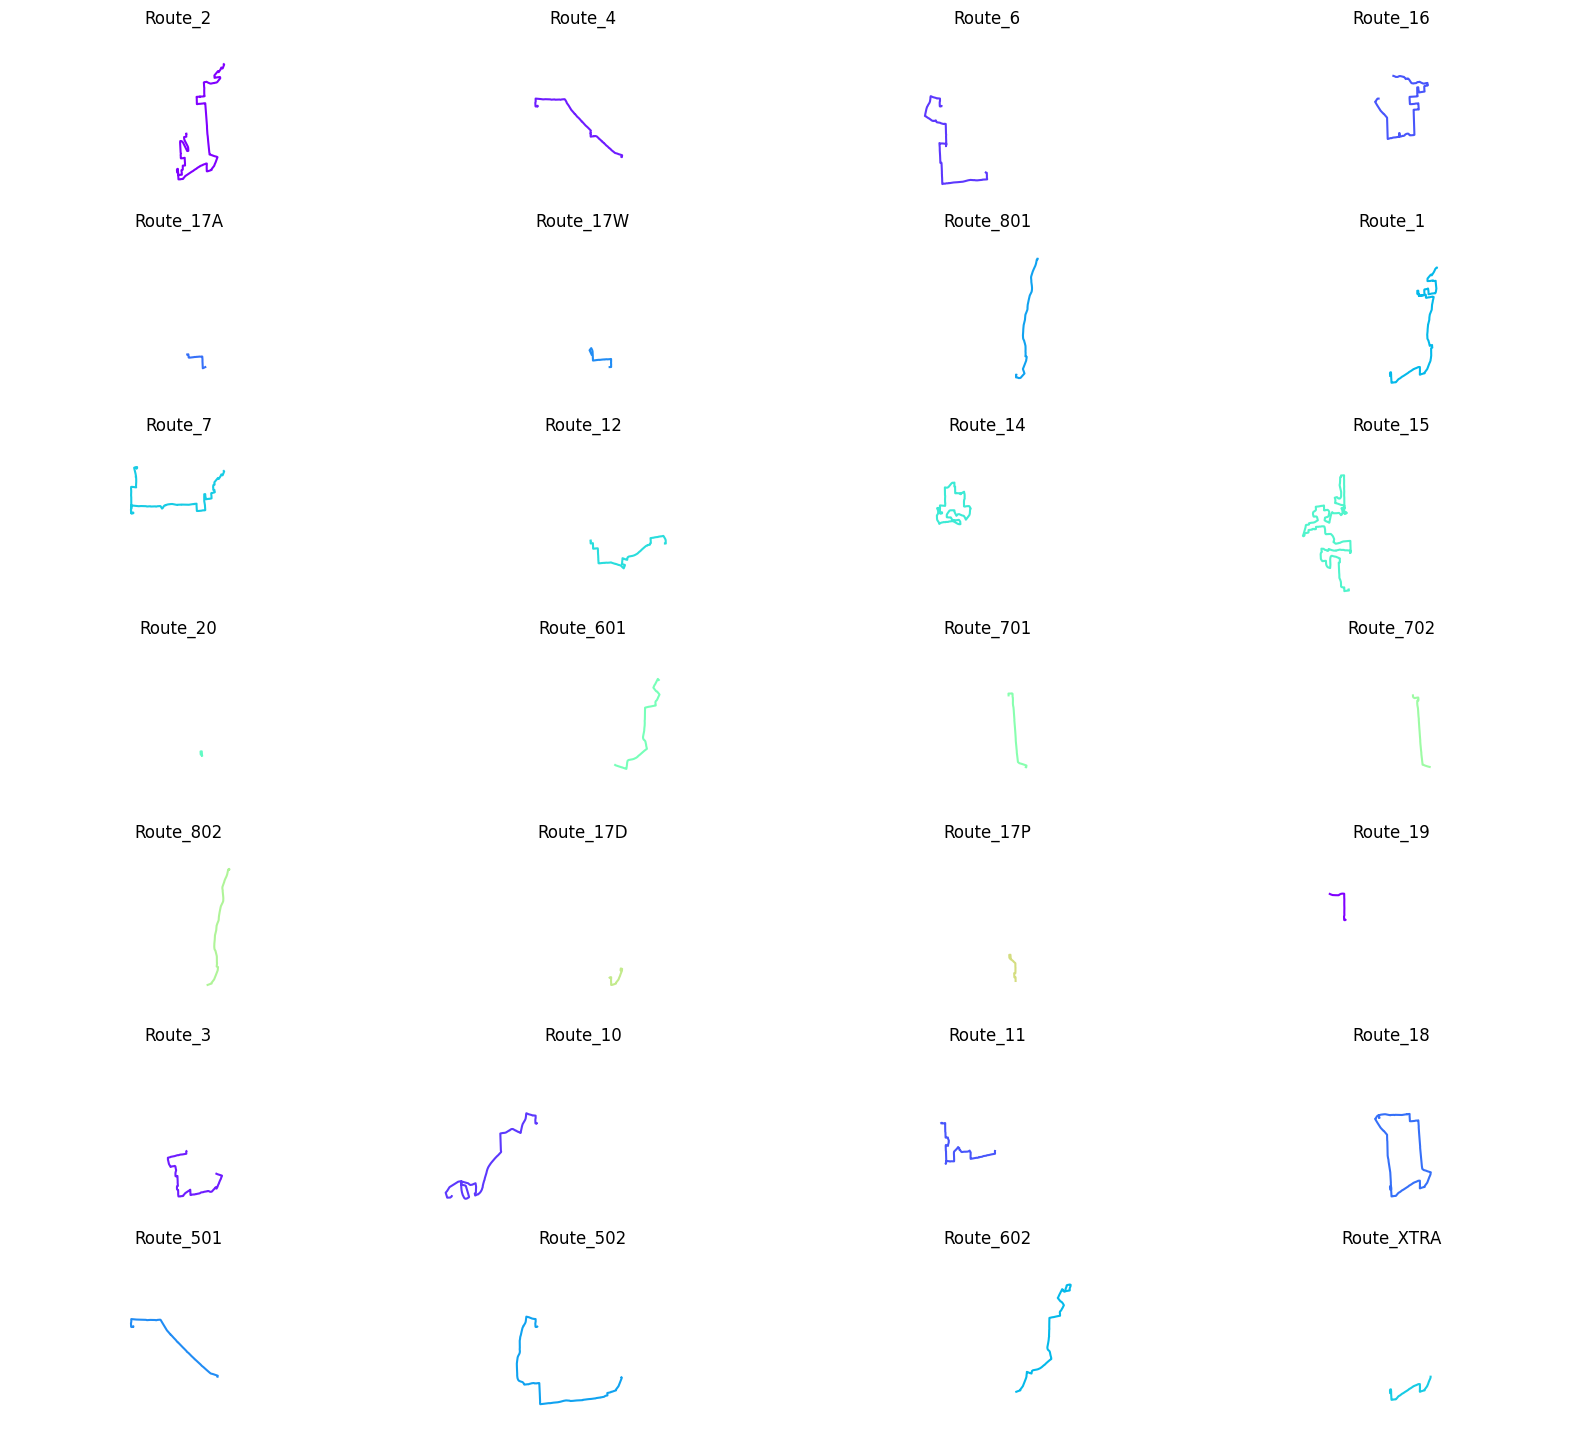

In [80]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


### PLOT BUILD
fig, ax = plt.subplots(7, 4, figsize=(20,10))

colors2 = cm.rainbow(np.linspace(0, 1, len(coordinates_dict)))
l = 0
for i, coord in enumerate(coordinates_dict):
    x = [j[0] for j in coordinates_dict[coord]]
    y = [j[1] for j in coordinates_dict[coord]]
    ax[i//4, i%4].set_ylim([44.21, 44.29])
    ax[i//4, i%4].set_xlim([-76.7, -76.35])
    ax[i//4, i%4].plot(y, x, color=colors2[i%len(colors)], label=coord)
    ax[i//4, i%4].set_title('Route_{}'.format(coord))
    ax[i//4, i%4].axis('off')






#fig.suptitle('My Scatter Plots')
#fig.tight_layout()
fig.subplots_adjust(top=1.5)
#plt.axis('off')

plt.show()

#plt.clf()
#plt.close()

In [82]:
october = pd.read_csv("/content/drive/MyDrive/451/Transit Data-October.csv")
october

,Date,Time,Class,Operation,Bus,Route,Latitude,Longitude
0,2017-10-01 0:00,1900-01-01 1:43,QUEENS,Exact Fare,620,17,44.227860,-76.496938
1,2017-10-01 0:00,1900-01-01 1:43,QUEENS,Exact Fare,620,17,44.227860,-76.496938
2,2017-10-01 0:00,1900-01-01 1:58,ADULT,Pass (Multi-ride card),620,17,44.232035,-76.491397
3,2017-10-01 0:00,1900-01-01 1:58,QUEENS,Exact Fare,620,17,44.232035,-76.491397
4,2017-10-01 0:00,1900-01-01 1:58,QUEENS,Exact Fare,620,17,44.232035,-76.491397
...,...,...,...,...,...,...,...,...
704534,2017-10-01 0:00,1900-01-01 17:07,QUEENS,Exact Fare,1362,701,44.255135,-76.572517
704535,2017-10-01 0:00,1900-01-01 17:07,QUEENS,Exact Fare,1362,701,44.255135,-76.572517
704536,2017-10-01 0:00,1900-01-01 17:07,ST LAWRENCE,Exact Fare,1362,701,44.255135,-76.572517
704537,2017-10-01 0:00,1900-01-01 17:08,QUEENS,Exact Fare,1257,18,44.231425,-76.484333


In [83]:
october = october.drop(columns=["Class", "Operation"])

In [84]:
october = october.drop(october[(october.Latitude < 44.215) | (october.Latitude > 45)].index)
october = october.drop(october[(october.Longitude < -77) | (october.Longitude > -76.4)].index)

In [85]:
def get_route_list():
    route_list = october['Route'].unique()
    route_list.sort()
    return route_list

route_list = get_route_list()
print(route_list, len(route_list))

[  1   2   3   4   6   7   8  10  11  12  13  14  15  16  17  18  20 501
 502 601 701] 21


In [93]:
# prompt: create a dictionary where each dictionary key is the route number and the item is a list of the october[['Latitude', 'Longitude']]

route_dict = {}
for route in route_list:
  route_dict[route] = list(october[october["Route"] == route][['Latitude', 'Longitude']].round(3).drop_duplicates().itertuples(index=False, name=None))

route_dict[1][:10]

[(44.255, -76.573),
 (44.221, -76.525),
 (44.224, -76.526),
 (44.267, -76.558),
 (44.225, -76.492),
 (44.256, -76.483),
 (44.224, -76.527),
 (44.245, -76.488),
 (44.224, -76.51),
 (44.24, -76.487)]

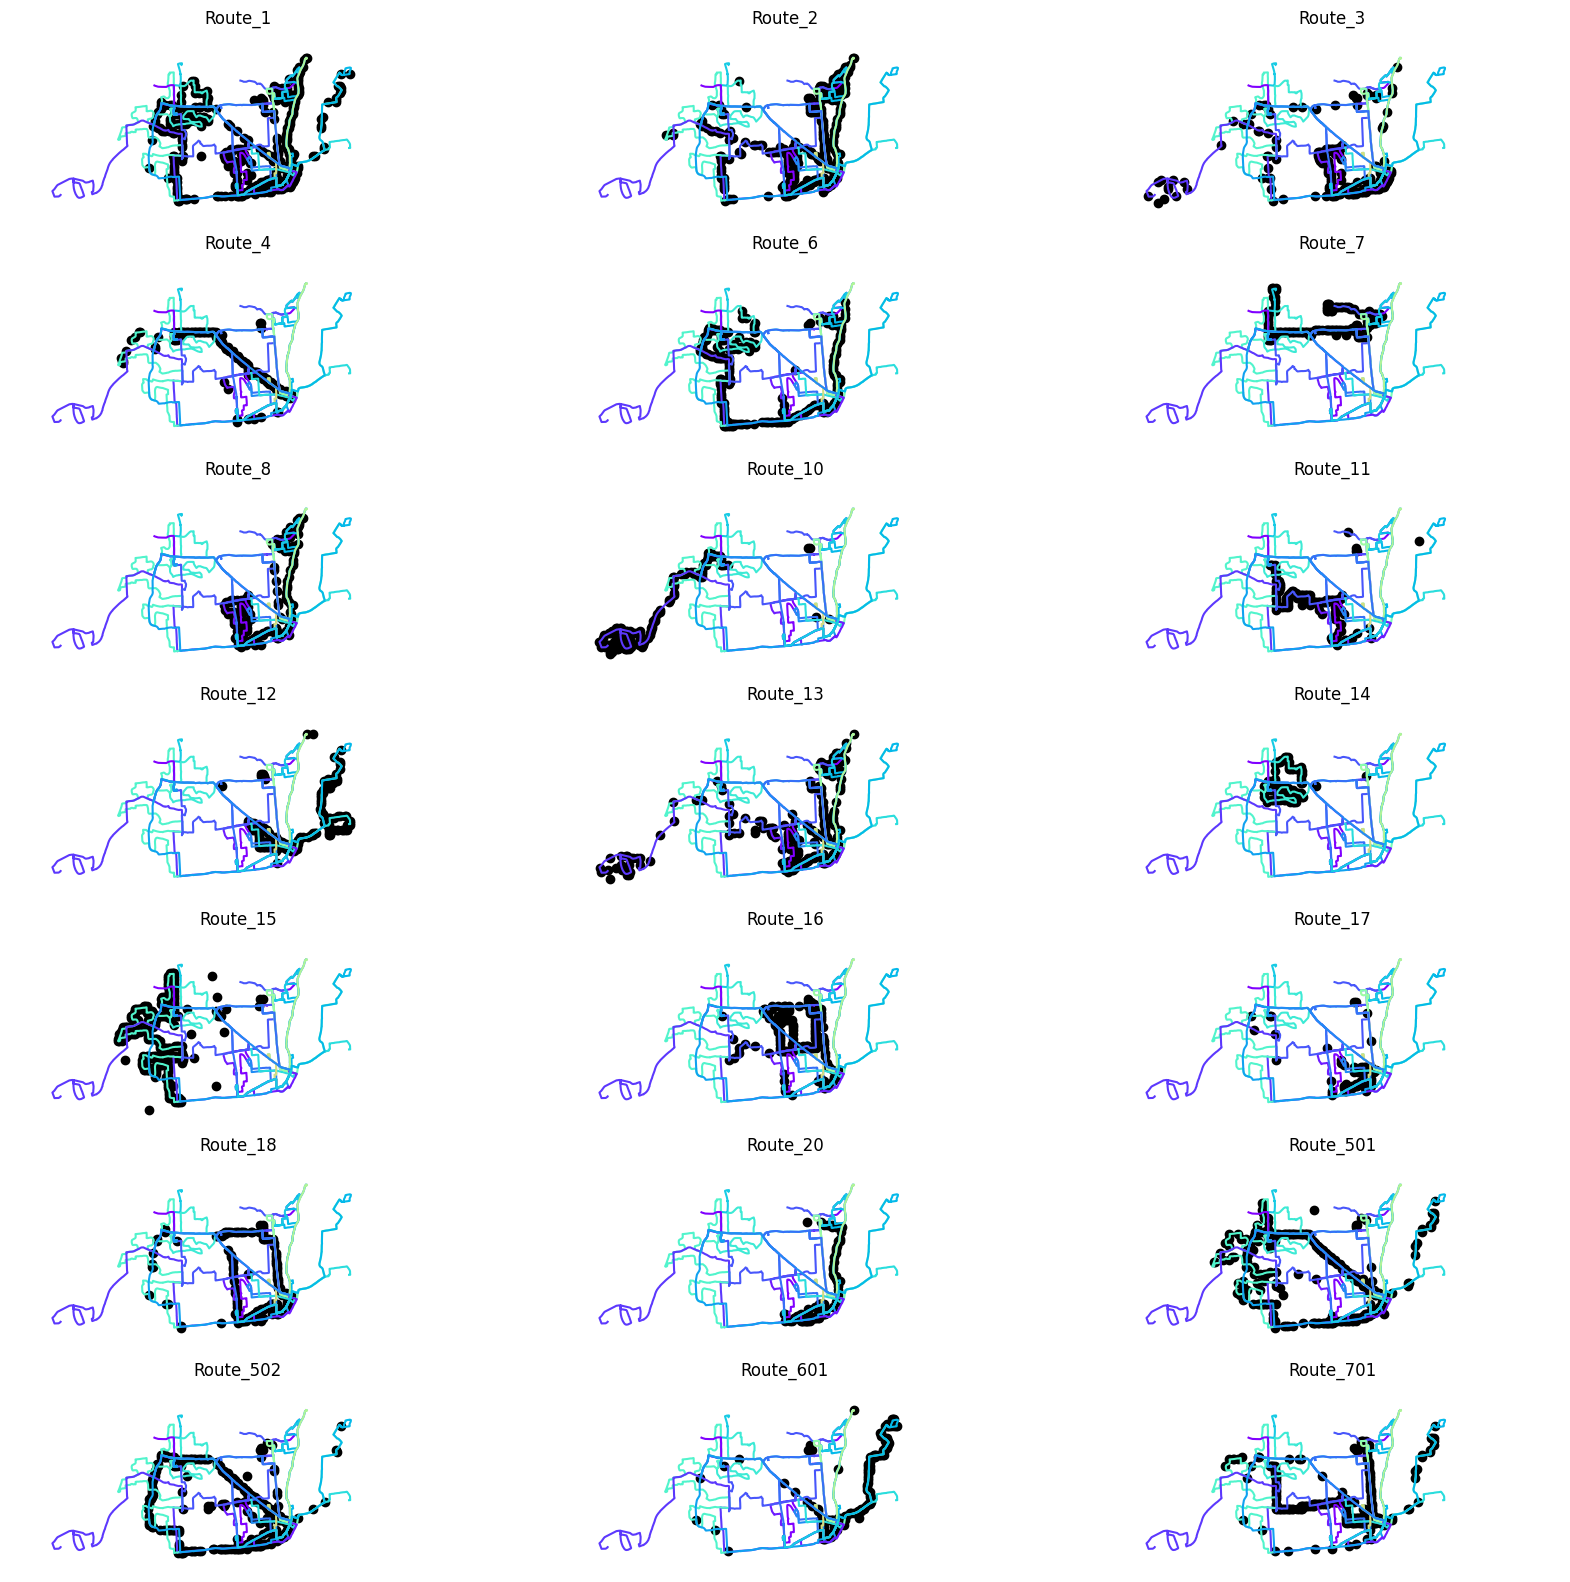

In [99]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


### PLOT BUILD
fig2, ax2 = plt.subplots(7, 3, figsize=(20,20))


colors2 = cm.rainbow(np.linspace(0, 1, len(coordinates_dict)))
l = 0
for i, route in enumerate(route_dict):
    x, y = zip(*route_dict[route])
    ax2[i//3, i%3].scatter(y, x, color="black")

    ax2[i//3, i%3].set_ylim([44.21, 44.29])
    ax2[i//3, i%3].set_xlim([-76.7, -76.35])
    ax2[i//3, i%3].set_title('Route_{}'.format(route))
    ax2[i//3, i%3].axis('off')

    for k, coord in enumerate(coordinates_dict):
        x = [j[0] for j in coordinates_dict[coord]]
        y = [j[1] for j in coordinates_dict[coord]]
        #plt.plot(y, x, color=colors2[i%len(colors)], label=coord)

        ax2[i//3, i%3].plot(y, x, color=colors2[k%len(colors)], label=coord)






#fig.suptitle('My Scatter Plots')
#fig.tight_layout()
fig.subplots_adjust(top=1.5)
#plt.axis('off')

plt.show()

#plt.clf()
#plt.close()